# **Stat for Data Assessment**

## **1. Classification of variable types: numerical and categorical**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)
df.head(8)

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,0.0,22915,22920,...,-3.589550,-7.029251,-5.041759,-3.787629,-5.666224,1.065317,1.507660,-0.753246,-3.146396,-6.584362
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,0.0,57322,57321,...,6.224858,-0.172910,0.243633,-1.633022,-0.295188,-1.980336,-1.286475,-1.025739,6.363573,-0.034582
7,1011,AL,Bullock County,6.0,6.0,6.0,6.0,3.0,10914,10911,...,-20.820159,-2.953628,-22.546973,-7.047547,-6.427829,9.521116,-24.590553,-3.079736,-21.014740,-3.150537


In [3]:
df.columns

Index(['FIPS', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2017', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018'],
      dtype='object', length=149)

In [4]:
np.min(np.array((df["R_NET_MIG_2013"])))

nan

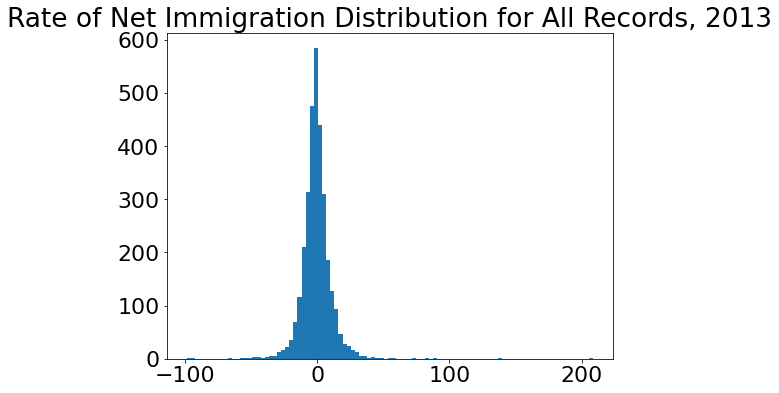

In [5]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 22})
plt.hist(df["R_NET_MIG_2013"],bins=np.linspace(np.nanmin(df["R_NET_MIG_2013"]),np.nanmax(df["R_NET_MIG_2013"]),num=100))
plt.title("Rate of Net Immigration Distribution for All Records, 2013");

## **2. Numerical variable: mean, median and mode**

### **2.1 mean**

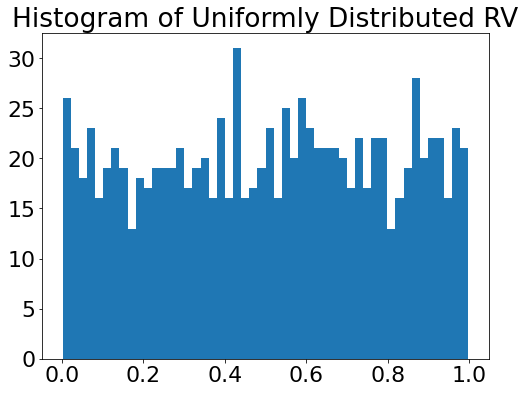

In [6]:
import random
random.seed(2019)
plt.figure(figsize=(8,6))
rvs = [random.random() for _ in range(1000)]
plt.hist(rvs, bins=50)
plt.title("Histogram of Uniformly Distributed RV");

In [7]:
np.mean(rvs)

0.5054772636416909

### **2.2 median**

In [8]:
np.median(rvs)

0.5136755026003803

In [9]:
rvs[-1] = 1000
print(np.mean(rvs), np.median(rvs))

1.5054701085937803 0.5150437661964872


### **2.3 mode**

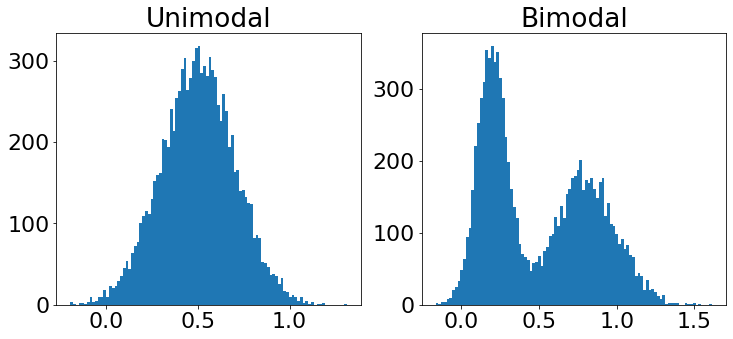

In [10]:
r1 = [random.normalvariate(0.5,0.2) for _ in range(10000)]
r2 = [random.normalvariate(0.2,0.1) for _ in range(5000)]
r3 = [random.normalvariate(0.8,0.2) for _ in range(5000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1,bins=100)
axes[0].set_title("Unimodal")
axes[1].hist(r2+r3,bins=100)
axes[1].set_title("Bimodal");

## **3. Numerical variable: variance, standard deviation, quartiles and skewness**

### **3.1 variance**

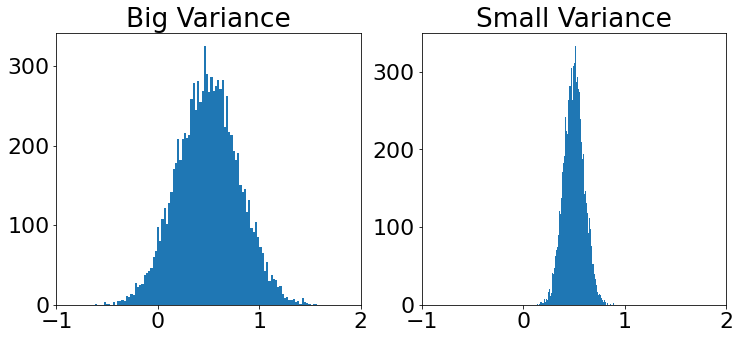

In [11]:
r1 = [random.normalvariate(0.5,0.3) for _ in range(10000)]
r2 = [random.normalvariate(0.5,0.1) for _ in range(10000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1,bins=100)
axes[0].set_xlim([-1,2])
axes[0].set_title("Big Variance")
axes[1].hist(r2,bins=100)
axes[1].set_title("Small Variance")
axes[1].set_xlim([-1,2]);

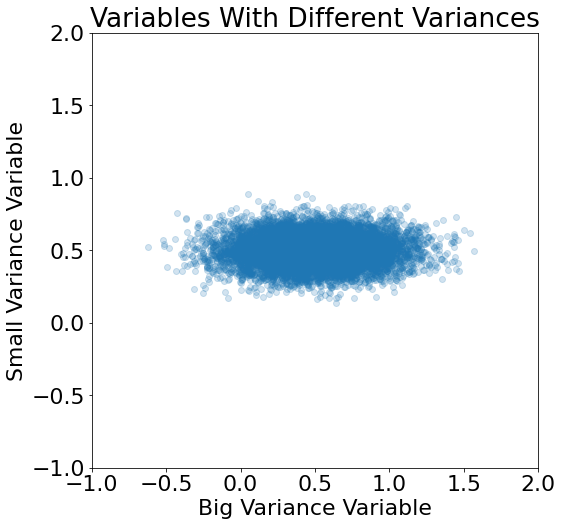

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(r1,r2,alpha=0.2)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel("Big Variance Variable")
plt.ylabel("Small Variance Variable")
plt.title("Variables With Different Variances");

### **3.2 standard deviation**

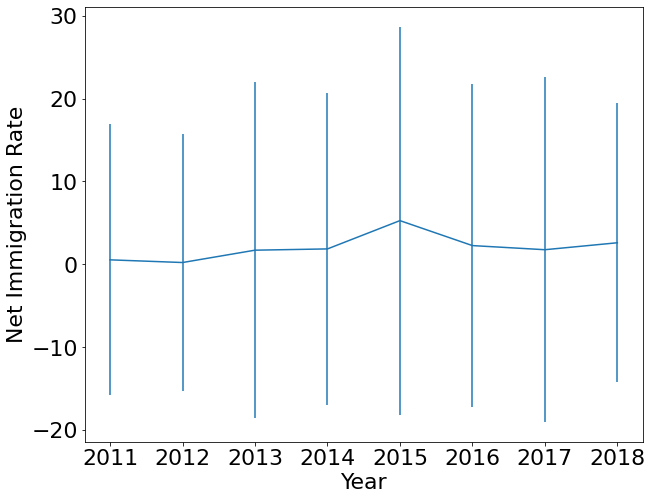

In [13]:
dfTX = df[df["State"]=="TX"].tail(-1)

YEARS = [year for year in range(2011,2019)]
MEANS = []
STDS = []
for i in range(2011,2019):
    year = "R_NET_MIG_"+str(i)
    MEANS.append(np.mean(dfTX[year]))
    STDS.append(np.std(dfTX[year]))

plt.figure(figsize=(10,8))
plt.errorbar(YEARS,MEANS,yerr=STDS)
plt.xlabel("Year")
plt.ylabel("Net Immigration Rate");

### **3.3 quartiles**

In [14]:
np.quantile(dfTX["R_NET_MIG_2013"],[0.25,0.5,0.75])

array([-7.83469971,  0.87919226,  8.84040759])

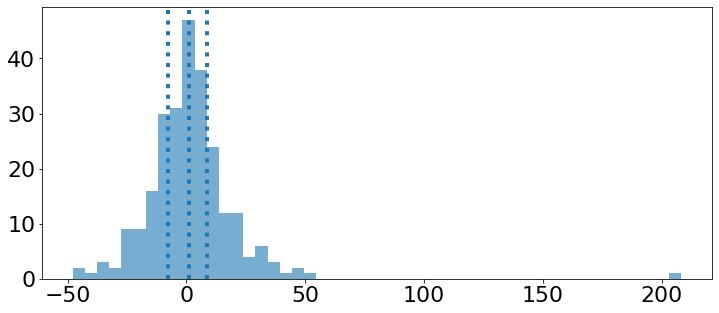

In [15]:
plt.figure(figsize=(12,5))
plt.hist(dfTX["R_NET_MIG_2013"],bins=50,alpha=0.6)
for quartile in np.quantile(dfTX["R_NET_MIG_2013"],[0.25,0.5,0.75]):
    plt.axvline(quartile,linestyle=':',linewidth=4)

### **3.4 skewness**

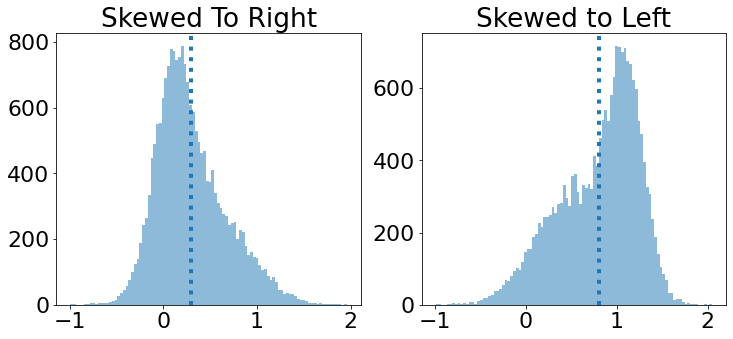

In [16]:
r1 = [random.normalvariate(0.5,0.4) for _ in range(10000)]
r2 = [random.normalvariate(0.1,0.2) for _ in range(10000)]
r3 = [random.normalvariate(1.1,0.2) for _ in range(10000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1+r2,bins=100,alpha=0.5)
axes[0].axvline(np.mean(r1+r2), linestyle=':',linewidth=4)
axes[0].set_title("Skewed To Right")
axes[1].hist(r1+r3,bins=100,alpha=0.5)
axes[1].axvline(np.mean(r1+r3),linestyle=':',linewidth=4)
axes[1].set_title("Skewed to Left");

## **4. A revisit of outlier detection**

### **4.1 symmetric case**

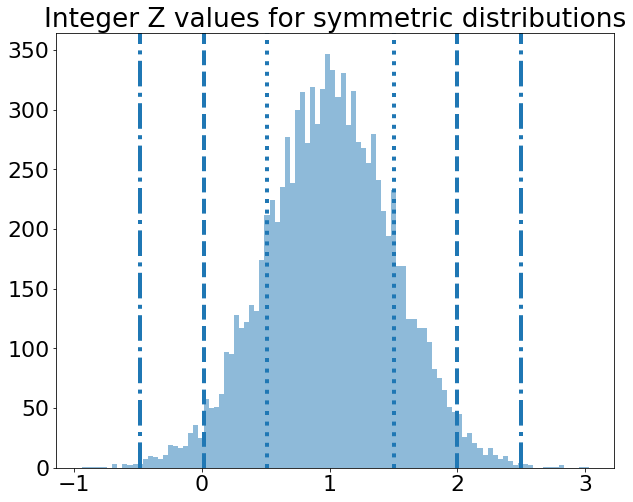

In [17]:
random.seed(2020)
x = [random.normalvariate(1, 0.5) for _ in range(10000)]
plt.figure(figsize=(10,8))
plt.hist(x,bins=100,alpha=0.5);
styles = [":","--","-."]
for i in range(3):
    plt.axvline(np.mean(x) + (i+1)*np.std(x),
                linestyle=styles[i],
                linewidth=4)
    plt.axvline(np.mean(x) - (i+1)*np.std(x),
                linestyle=styles[i],
                linewidth=4)
plt.title("Integer Z values for symmetric distributions");

### **4.2 asymmetric case**

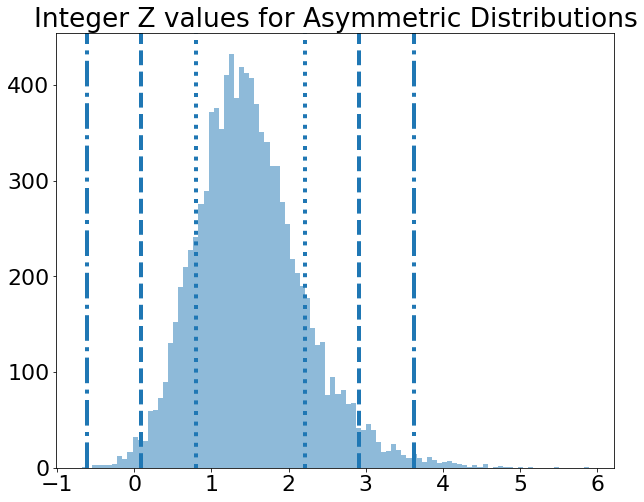

In [18]:
random.seed(2020)
x = [random.normalvariate(1, 0.5) + random.expovariate(2) for _ in range(10000)]
plt.figure(figsize=(10,8))
plt.hist(x,bins=100,alpha=0.5)
styles = [":","--","-."]
for i in range(3):
    plt.axvline(np.mean(x) + (i+1)*np.std(x),
                linestyle=styles[i],
                linewidth=4)
    plt.axvline(np.mean(x) - (i+1)*np.std(x),
                linestyle=styles[i],
                linewidth=4)
plt.title("Integer Z values for Asymmetric Distributions");

## **5. Categorical Variables and Categorization**

### **5.1 frequencies and proportions**

In [19]:
from collections import Counter

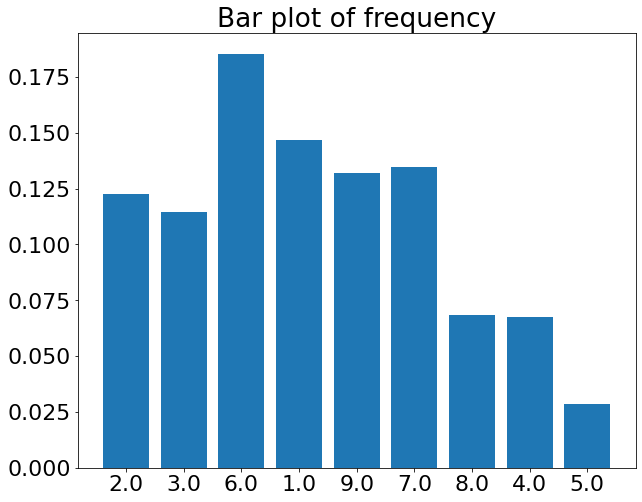

In [20]:
counter = Counter(df["Rural-urban_Continuum Code_2013"].dropna())
labels = []
x = []
for key, val in counter.items():
    labels.append(str(key))
    x.append(val)
x = np.array(x)/sum(x) # uncomment for frequency 
plt.figure(figsize=(10,8))
plt.bar(labels,x)
plt.title("Bar plot of frequency");

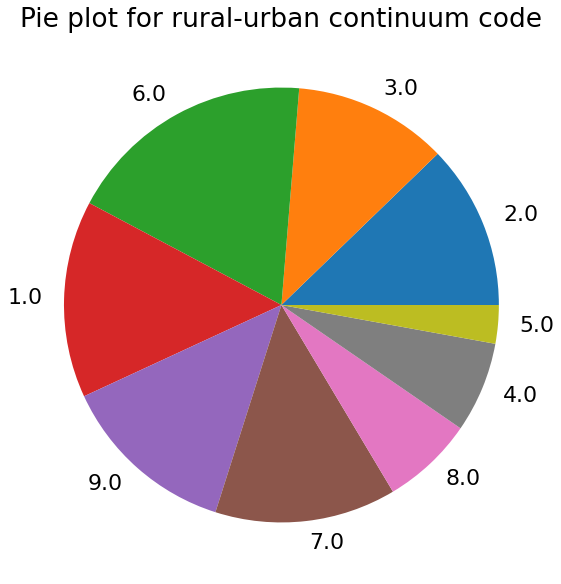

In [21]:
plt.figure(figsize=(10,10))
plt.pie(x=x,labels=labels,)
plt.title("Pie plot for rural-urban continuum code");

#### **5.1.1 mode for categorical variables**

In [22]:
counter = Counter(df["Rural-urban_Continuum Code_2013"].dropna())
counter

Counter({2.0: 394,
         3.0: 369,
         6.0: 597,
         1.0: 472,
         9.0: 425,
         7.0: 434,
         8.0: 220,
         4.0: 217,
         5.0: 92})

### **5.2 Transform continuous variable to categorical variable**

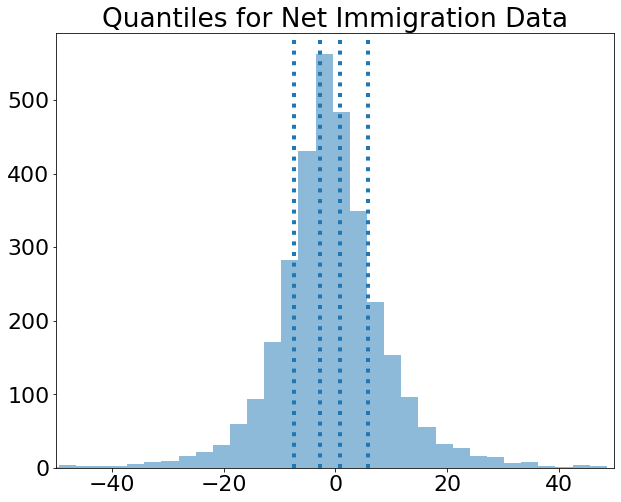

In [23]:
series = df["R_NET_MIG_2013"].dropna()
quantiles = np.quantile(series,[0.2*i for i in range(1,5)])
plt.figure(figsize=(10,8))
plt.hist(series,bins=100,alpha=0.5)
plt.xlim(-50,50)
for i in range(len(quantiles)):
    plt.axvline(quantiles[i],linestyle=":",
                linewidth=4)
plt.title("Quantiles for Net Immigration Data");

## **6. Bivariate Descriptive Statistics**

### **6.1 Covariance**

In [24]:
corrs = dfTX[['R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018']].dropna().corr()
corrs

,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
R_NET_MIG_2011,1.000000,-0.025355,0.476505,-0.021194,0.407675,0.030318,0.344111,0.492326
R_NET_MIG_2012,-0.025355,1.000000,0.028037,0.555593,-0.027442,0.048258,-0.187224,0.049451
R_NET_MIG_2013,0.476505,0.028037,1.000000,-0.007720,0.713877,0.024169,0.310188,0.376498
R_NET_MIG_2014,-0.021194,0.555593,-0.007720,1.000000,-0.226211,0.177007,-0.148383,0.185914
R_NET_MIG_2015,0.407675,-0.027442,0.713877,-0.226211,1.000000,0.223869,0.568450,0.476637
R_NET_MIG_2016,0.030318,0.048258,0.024169,0.177007,0.223869,1.000000,0.595684,0.443691
R_NET_MIG_2017,0.344111,-0.187224,0.310188,-0.148383,0.568450,0.595684,1.000000,0.596495
R_NET_MIG_2018,0.492326,0.049451,0.376498,0.185914,0.476637,0.443691,0.596495,1.000000


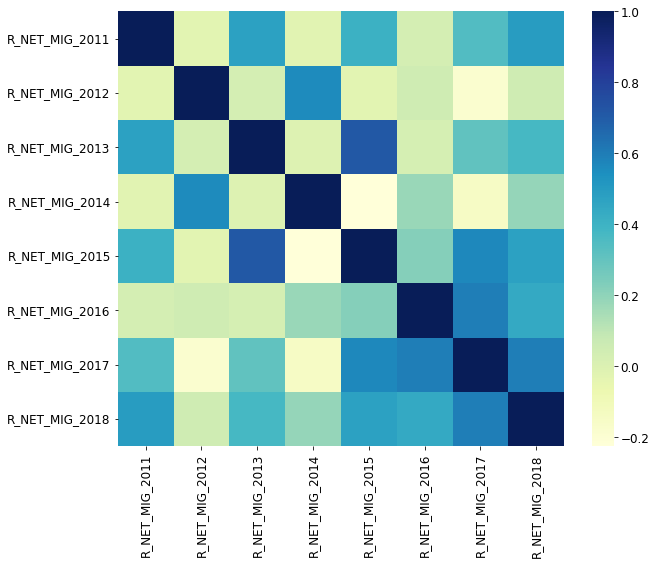

In [25]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corrs,cmap="YlGnBu");

### **6.2 Cross-tabulation**

In [26]:
weather = ["rainy","sunny","rainy","windy","windy",
           "sunny","rainy","windy","sunny","rainy",
           "sunny","windy","windy"]
golfing = ["Yes","Yes","No","No","Yes","Yes","No","No",
          "Yes","No","Yes","No","No"]

dfGolf = pd.DataFrame({"weather":weather,"golfing":golfing})
pd.crosstab(dfGolf.weather, dfGolf.golfing, margins=True)

golfing,No,Yes,All
weather,,,
rainy,3,1,4
sunny,0,4,4
windy,4,1,5
All,7,6,13
